In [3]:
import numpy as np
import random

from Gridworld import Gridworld
from utils import visualize_grid, policy_score
from __future__ import unicode_literals


Taking action: d
Action:  d Reward:  0
Taking action: r
Action:  r Reward:  0
Taking action: u
Action:  u Reward:  0
Taking action: tl
Action:  tl Reward:  0
Taking action: l
Action:  l Reward:  0
Taking action: u
Action:  u Reward:  0
Taking action: r
Action:  r Reward:  0
Taking action: l
Action:  l Reward:  0
Taking action: u
Action:  u Reward:  0
Taking action: u
Action:  u Reward:  -1
Taking action: tr
Action:  tr Reward:  0
Taking action: d
Action:  d Reward:  0
Taking action: u
Action:  u Reward:  0
Taking action: tl
Action:  tl Reward:  0
Taking action: tl
Action:  tl Reward:  0
Taking action: d
Action:  d Reward:  0
Taking action: r
Action:  r Reward:  0
Taking action: tr
Action:  tr Reward:  0
Taking action: r
Action:  r Reward:  -1
Taking action: tl
Action:  tl Reward:  0
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
-2


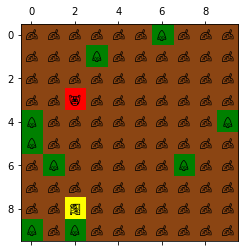

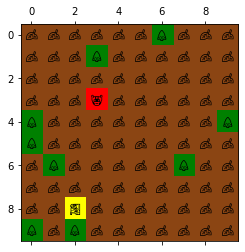

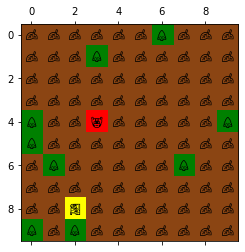

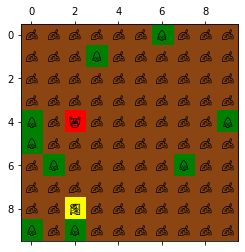

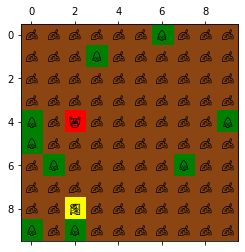

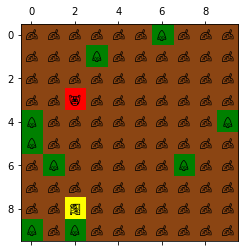

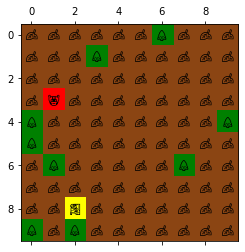

Error in callback <function flush_figures at 0x000001F50C675DC0> (for post_execute):


KeyboardInterrupt: 

In [4]:
# simulate random policy
rewards=[]
g = Gridworld(gridworld_length=10)
# simulate the agent's actions
for _ in range(20):
    # g.print_gridworld()
    visualize_grid(g.gridworld_to_arr())
    # choose a random action
    action = random.choice(g.actions[0])
    print(f'Taking action: {action}')
    # take the action and update the state
    reward = g.takeAction(action)
    print("Action: ", action, "Reward: ", reward)
    rewards.append(reward)    
    
gamma = 1
print(rewards)
print(policy_score(rewards, gamma))